In [1]:
import numpy as np 
import pandas as pd
import re,string
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, chi2
# from sklearn.ensemble import RandomForestClassifier
import pickle
import nltk
nltk.download('stopwords')
%matplotlib inline

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\asmit\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
df=pd.read_csv("train.csv")
df


,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
159566,ffe987279560d7ff,""":::::And for the second time of asking, when ...",0,0,0,0,0,0
159567,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0
159568,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0
159569,fff125370e4aaaf3,And it looks like it was actually you who put ...,0,0,0,0,0,0


In [34]:
df["toxic"].unique()

array([0, 1], dtype=int64)

In [3]:
df.head(10)


,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
5,00025465d4725e87,"""\n\nCongratulations from me as well, use the ...",0,0,0,0,0,0
6,0002bcb3da6cb337,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0
7,00031b1e95af7921,Your vandalism to the Matt Shirvington article...,0,0,0,0,0,0
8,00037261f536c51d,Sorry if the word 'nonsense' was offensive to ...,0,0,0,0,0,0
9,00040093b2687caa,alignment on this subject and which are contra...,0,0,0,0,0,0


In [4]:
# df.groupby("comment_text").toxic.count().plot.bar()
# plt.show()

In [5]:
df.describe()

,toxic,severe_toxic,obscene,threat,insult,identity_hate
count,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000
mean,0.095844,0.009996,0.052948,0.002996,0.049364,0.008805
std,0.294379,0.099477,0.223931,0.054650,0.216627,0.093420
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
df.isnull().sum()

id               0
comment_text     0
toxic            0
severe_toxic     0
obscene          0
threat           0
insult           0
identity_hate    0
dtype: int64

In [7]:
df[df.duplicated].sum()

id               0.0
comment_text     0.0
toxic            0.0
severe_toxic     0.0
obscene          0.0
threat           0.0
insult           0.0
identity_hate    0.0
dtype: float64

In [9]:
df["severe_toxic"].shape

(159571,)

In [10]:
for col in ["toxic","severe_toxic","obscene","threat","insult","identity_hate"]:
    print(col,df[col].sum())

toxic 15294
severe_toxic 1595
obscene 8449
threat 478
insult 7877
identity_hate 1405


In [11]:
nltk.download("stopwords")
stop_word=set(stopwords.words("english"))
stemmer=SnowballStemmer("english")
df['cleaned'] = df['comment_text'].apply(lambda x: " ".join([stemmer.stem(i) for i in re.sub("[^a-zA-Z]", " ", x).split() if i not in stop_word]).lower())

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\asmit\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [12]:
df

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,cleaned
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,explan whi edit made usernam hardcor metallica...
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,d aww he match background colour i seem stuck ...
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,hey man i realli tri edit war it guy constant ...
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,more i make real suggest improv i wonder secti...
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,you sir hero ani chanc rememb page
...,...,...,...,...,...,...,...,...,...
159566,ffe987279560d7ff,""":::::And for the second time of asking, when ...",0,0,0,0,0,0,and second time ask view complet contradict co...
159567,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0,you asham that horribl thing put talk page
159568,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0,spitzer umm there actual articl prostitut ring...
159569,fff125370e4aaaf3,And it looks like it was actually you who put ...,0,0,0,0,0,0,and look like actual put speedi first version ...


In [13]:
#combining all the labelinto single label
df["combined_label"]=df[["toxic","severe_toxic","obscene","threat","insult","identity_hate"]].max(axis=1)

In [14]:
df

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,cleaned,combined_label
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,explan whi edit made usernam hardcor metallica...,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,d aww he match background colour i seem stuck ...,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,hey man i realli tri edit war it guy constant ...,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,more i make real suggest improv i wonder secti...,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,you sir hero ani chanc rememb page,0
...,...,...,...,...,...,...,...,...,...,...
159566,ffe987279560d7ff,""":::::And for the second time of asking, when ...",0,0,0,0,0,0,and second time ask view complet contradict co...,0
159567,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0,you asham that horribl thing put talk page,0
159568,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0,spitzer umm there actual articl prostitut ring...,0
159569,fff125370e4aaaf3,And it looks like it was actually you who put ...,0,0,0,0,0,0,and look like actual put speedi first version ...,0


In [15]:
df[df["combined_label"]==1][:10]

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,cleaned,combined_label
6,0002bcb3da6cb337,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0,cocksuck befor you piss around on my work,1
12,0005c987bdfc9d4b,Hey... what is it..\n@ | talk .\nWhat is it......,1,0,0,0,0,0,hey talk what exclus group wp taliban good des...,1
16,0007e25b2121310b,"Bye! \n\nDon't look, come or think of comming ...",1,0,0,0,0,0,bye don look come think com back tosser,1
42,001810bf8c45bf5f,You are gay or antisemmitian? \n\nArchangel WH...,1,0,1,0,1,1,you gay antisemmitian archangel white tiger me...,1
43,00190820581d90ce,"FUCK YOUR FILTHY MOTHER IN THE ASS, DRY!",1,0,1,0,1,0,fuck your filthi mother in the ass dri,1
44,001956c382006abd,I'm Sorry \n\nI'm sorry I screwed around with ...,1,0,0,0,0,0,i sorri i sorri i screw around someon talk pag...,1
51,001dc38a83d420cf,GET FUCKED UP. GET FUCKEEED UP. GOT A DRINK T...,1,0,1,0,0,0,get fuck up get fuckee up got a drink that you...,1
55,0020e7119b96eeeb,Stupid peace of shit stop deleting my stuff as...,1,1,1,0,1,0,stupid peac shit stop delet stuff asshol go di...,1
56,0020fd96ed3b8c8b,=Tony Sidaway is obviously a fistfuckee. He lo...,1,0,1,0,1,0,toni sidaway obvious fistfucke he love arm ass,1
58,0021fe88bc4da3e6,My Band Page's deletion. You thought I was gon...,1,0,1,0,0,0,my band page delet you thought i gone delet co...,1


In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
lg=LogisticRegression()
vectorizer=TfidfVectorizer(min_df=3,stop_words="english",norm="l2")

X=df["cleaned"]
y=df["combined_label"]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

#creating pipeline
pipeline=Pipeline([
    ("vect" , vectorizer),
    ("chi" , SelectKBest(chi2, k=11000)),
    ('clf', LogisticRegression(random_state=0))
])
# # param_grid = {'vect__max_features': [1000, 5000, 10000, 20000]}

# # # Perform grid search
# # grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')
# # grid_search.fit(X_train, y_train)

# # # Print the best parameter value and corresponding score
# # print("Best value of k:", grid_search.best_params_['vect__max_features'])
# # print("Best accuracy:", grid_search.best_score_)
model=pipeline.fit(X_train,y_train)

C:\Users\asmit\AppData\Local\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [17]:
X_test

28783                         redirect user talk rjn archiv
21391     unorthodox interrog i tempt chang unorthodox i...
48249     mayb right stop let peopl join project we stop...
88332     your appar self promot edit hello liliavalitov...
24495     thank mate heard sammir got hisself shot bourb...
                                ...                        
84108               i made retouch would remov comment text
125898    if dont know mean look it up do think i make n...
14443     histor fact concern current armenia pertain wi...
47871     ga review this review transclud talk sholay ga...
129922                      i hope leav shithol like faggot
Name: cleaned, Length: 47872, dtype: object

In [33]:
from sklearn.metrics import accuracy_score
y_pred=pipeline.predict(X_test)
accuracy=accuracy_score(y_test,y_pred)
print(accuracy)
report = classification_report(y_test, y_pred)
print(report)
matrix=confusion_matrix(y_test, y_pred)
print(matrix)

0.9566552473262032
              precision    recall  f1-score   support

           0       0.96      0.99      0.98     43013
           1       0.92      0.62      0.75      4859

    accuracy                           0.96     47872
   macro avg       0.94      0.81      0.86     47872
weighted avg       0.96      0.96      0.95     47872

[[42761   252]
 [ 1823  3036]]


In [35]:
predictions = pipeline.predict(X_test)
predictions

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

Text(0.5, 427.9555555555555, 'Predicted label')

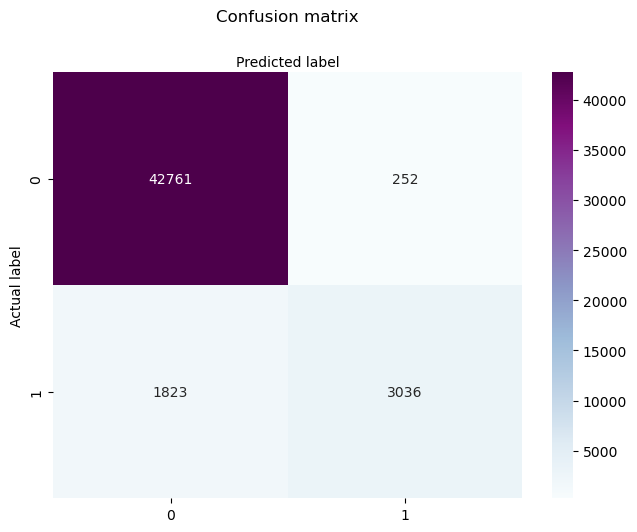

In [51]:
from sklearn.metrics import confusion_matrix,classification_report
import seaborn as sns

cm = confusion_matrix(y_test,predictions)
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
# tick_marks
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# # create heatmap
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="BuPu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

# Using Naive bayes



In [59]:
from sklearn.naive_bayes import MultinomialNB
nb = Pipeline([('tfidf', TfidfVectorizer()),
                ('clf', MultinomialNB()),
              ])
nb.fit(X_train,y_train)

test_predict = nb.predict(X_test)

train_accuracy = round(nb.score(X_train,y_train)*100)
test_accuracy =round(accuracy_score(test_predict, y_test)*100)


print("Naive Bayes Train Accuracy Score : {}% ".format(train_accuracy ))
print("Naive Bayes Test Accuracy Score  : {}% ".format(test_accuracy ))
print()
print(classification_report(y_test,test_predict))


Naive Bayes Train Accuracy Score : 92% 
Naive Bayes Test Accuracy Score  : 92% 

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     43013
           1       1.00      0.22      0.36      4859

    accuracy                           0.92     47872
   macro avg       0.96      0.61      0.66     47872
weighted avg       0.93      0.92      0.90     47872

